#Лабораторная работа №2

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("./dataset/spotify.csv")

In [14]:
bpt_list = []
for i, row in data.iterrows():
    minutes = row['duration_ms'] / (1000 * 60)
    bpt = minutes * row['tempo']
    bpt_list.append(bpt)

bpt = pd.Series(bpt_list)
data.insert(0, "bpt", bpt)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpt               9530 non-null   float64
 1   trackName         10080 non-null  object 
 2   artistName        10080 non-null  object 
 3   msPlayed          10080 non-null  int64  
 4   genre             8580 non-null   object 
 5   danceability      9530 non-null   float64
 6   energy            9530 non-null   float64
 7   key               9530 non-null   float64
 8   loudness          9530 non-null   float64
 9   mode              9530 non-null   float64
 10  speechiness       9530 non-null   float64
 11  acousticness      9530 non-null   float64
 12  instrumentalness  9530 non-null   float64
 13  liveness          9530 non-null   float64
 14  valence           9530 non-null   float64
 15  tempo             9530 non-null   float64
 16  type              9530 non-null   object

In [16]:
data = data.drop(["trackName", "artistName", "msPlayed", "genre", "mode", "key", "type", "id", "uri", "track_href", "analysis_url", "duration_ms", "time_signature"], axis="columns")
data = data.dropna()

In [17]:
normalizer = MinMaxScaler()
normed_data = normalizer.fit_transform(data)
data = pd.DataFrame(normed_data, columns=data.columns.tolist())

In [18]:
from scipy import stats
data.info()
for attr in data:
    attr_zscore = np.abs(stats.zscore(data[attr]))
    data[attr] = data[attr][attr_zscore<3]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpt               9530 non-null   float64
 1   danceability      9530 non-null   float64
 2   energy            9530 non-null   float64
 3   loudness          9530 non-null   float64
 4   speechiness       9530 non-null   float64
 5   acousticness      9530 non-null   float64
 6   instrumentalness  9530 non-null   float64
 7   liveness          9530 non-null   float64
 8   valence           9530 non-null   float64
 9   tempo             9530 non-null   float64
dtypes: float64(10)
memory usage: 744.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpt               9474 non-null   float64
 1   danceability      9458 non-null  

In [19]:
for attr in data:
    data[attr] = data[attr].fillna(0.5)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpt               9530 non-null   float64
 1   danceability      9530 non-null   float64
 2   energy            9530 non-null   float64
 3   loudness          9530 non-null   float64
 4   speechiness       9530 non-null   float64
 5   acousticness      9530 non-null   float64
 6   instrumentalness  9530 non-null   float64
 7   liveness          9530 non-null   float64
 8   valence           9530 non-null   float64
 9   tempo             9530 non-null   float64
dtypes: float64(10)
memory usage: 744.7 KB


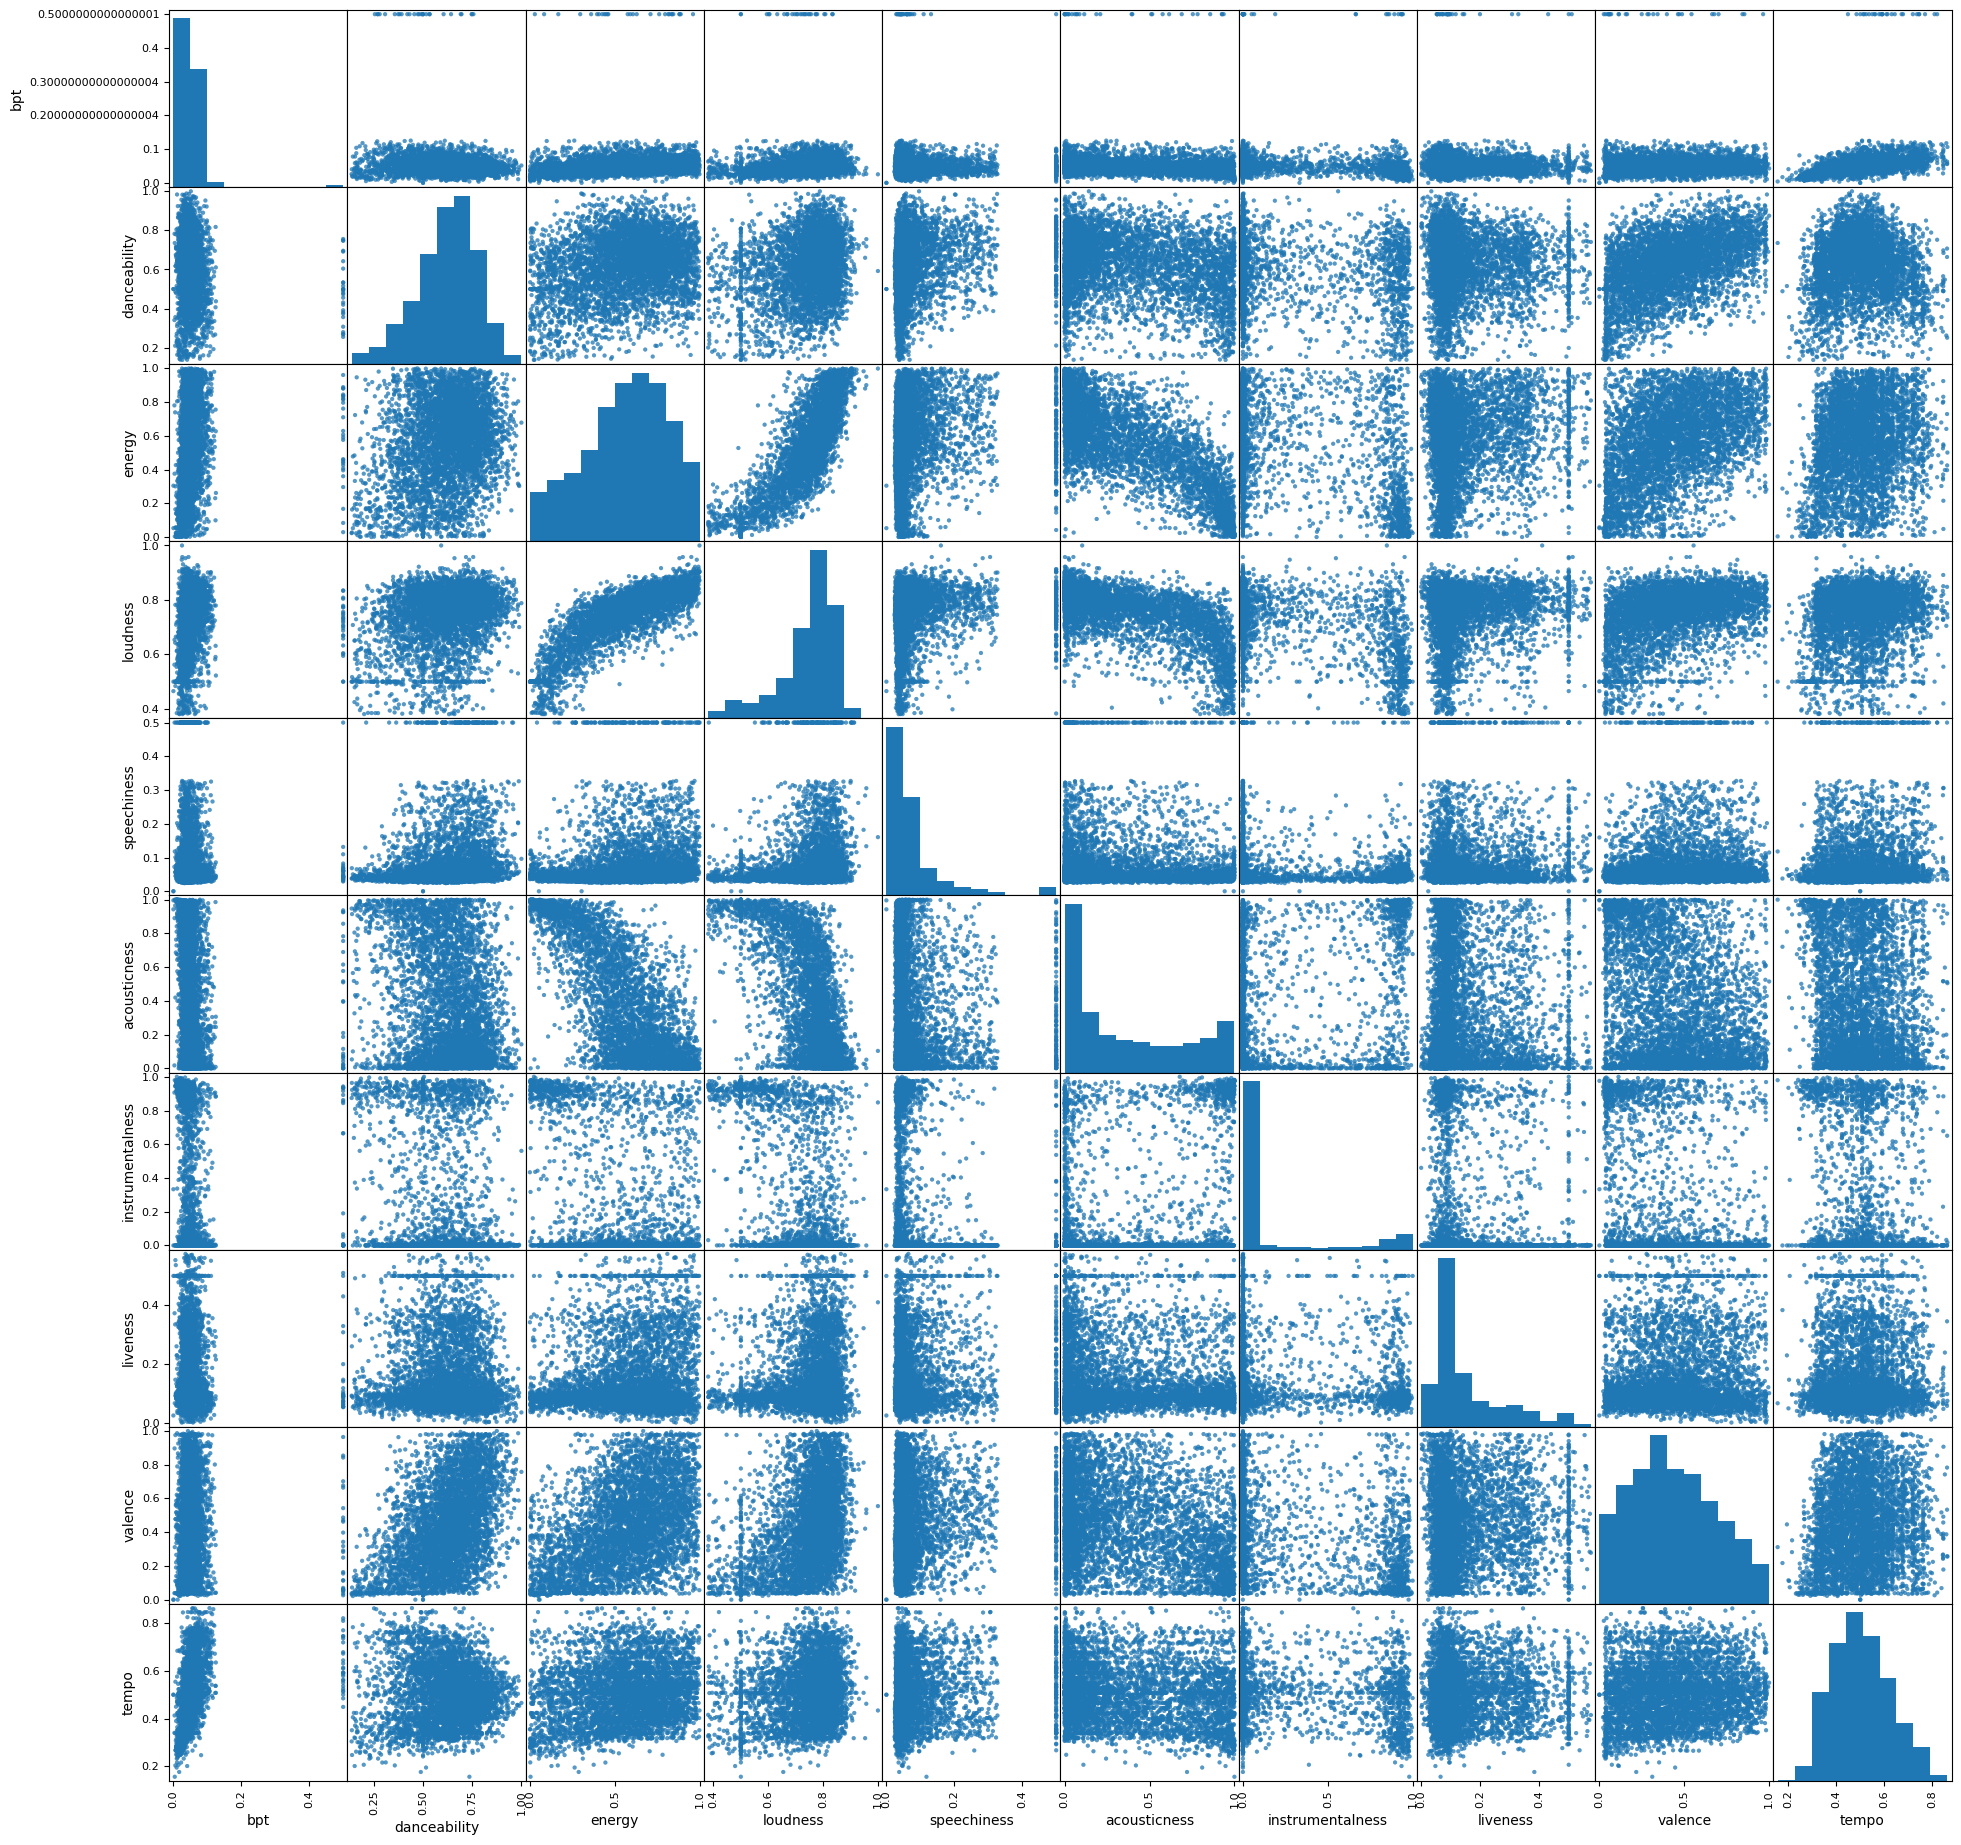

In [20]:
scatter = pd.plotting.scatter_matrix(
    data,
    figsize=(23, 23)
)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns.tolist())

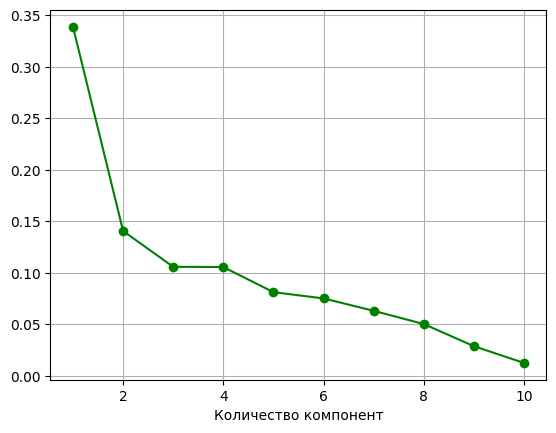

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(data)

disp = pca.explained_variance_ratio_
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers, disp, "go-")
plt.xlabel("Количество компонент")
plt.grid()
plt.show()

In [23]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

pca_data = pd.DataFrame(pca_data, columns = ['PC1', 'PC2'])

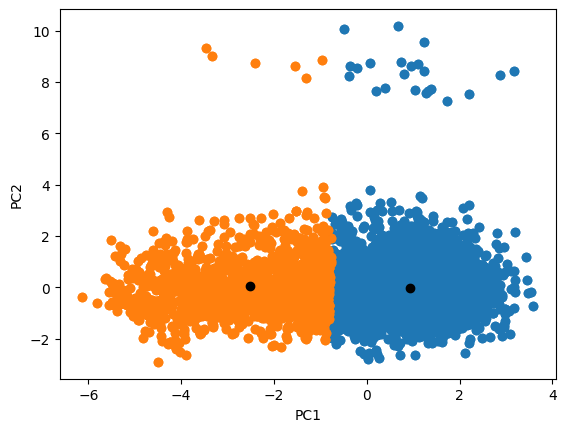

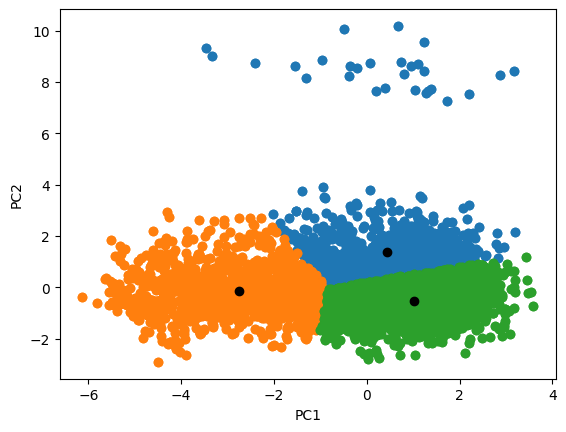

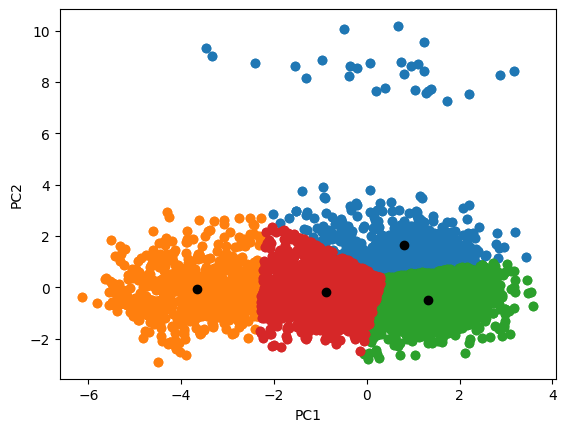

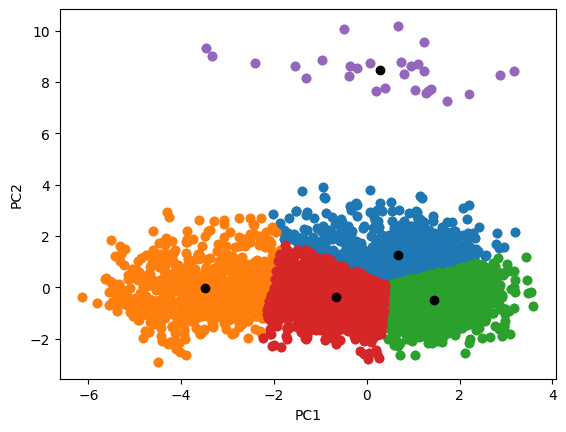

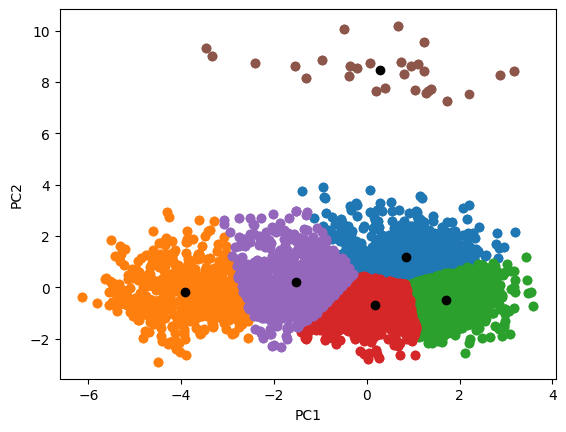

In [24]:
from sklearn.cluster import KMeans

max_clusters = 6

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data)

    centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    data_plot = pca_data.to_numpy()
    
    labels_map = dict()
    
    for i, el in enumerate(labels):
        v = labels_map.get(el)
        if v is not None and len(v) >= 0:
            labels_map[el].append(data_plot[i])
        else:
            labels_map[el] = []


    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    
    for label in labels_map.keys():
        x = []
        y = []
        for coord in labels_map[label]:
            x.append(coord[0])
            y.append(coord[1])
        plt.scatter(x, y)
                    

    plt.scatter(centers[:, 0], centers[:, 1], c='black')
    plt.show()